### Business Objective

The primary objective of this project is to leverage customer-level data analysis and predictive modeling in the telecom industry to reduce customer churn. Specifically, the goal is to identify and target high-risk churn customers, ultimately maximizing customer retention. By developing effective churn prediction models and identifying key indicators of churn, our aim is to help the telecom company retain its high-profit customers, thereby reducing the annual churn rate and optimizing customer acquisition costs.

The aim is to build and evaluate multiple classification models to identify the best model for the exercise

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#Filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading the data
df0=pd.read_csv("telecom_churn_data.csv")


In [5]:
#Inspecting the data
df0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
#Checking the shape
df0.shape

(99999, 226)

### Data Preparation

In [7]:
df0=df0.drop_duplicates(subset="mobile_number")

In [8]:
#Checking for nulls
null_perc= df0.isnull().sum().sort_values(ascending=False)/len(df0.index)
null_perc

arpu_3g_6            0.748467
night_pck_user_6     0.748467
total_rech_data_6    0.748467
arpu_2g_6            0.748467
max_rech_data_6      0.748467
                       ...   
max_rech_amt_7       0.000000
max_rech_amt_6       0.000000
total_rech_amt_9     0.000000
total_rech_amt_8     0.000000
sep_vbc_3g           0.000000
Length: 226, dtype: float64

In [9]:
#Dropping columns with >= 40% null values
null_cols=null_perc[null_perc>=0.4].index
df0=df0.drop(null_cols,axis=1)

In [10]:
#Checking null values after dropping the cols
df0.isnull().sum().sort_values(ascending=False)/len(df0.index)

loc_og_t2m_mou_9      0.077451
loc_ic_t2m_mou_9      0.077451
offnet_mou_9          0.077451
std_ic_t2f_mou_9      0.077451
roam_ic_mou_9         0.077451
                        ...   
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
max_rech_amt_9        0.000000
last_day_rch_amt_6    0.000000
sep_vbc_3g            0.000000
Length: 186, dtype: float64

#### The maximum null values in columns after the first treatment is ~7%, we will check these later after filtering out the high value customers

In [11]:
#Checking the shape of the dataframe after dropping high null cols
df0.shape

(99999, 186)

In [12]:
#identifying cols with zero variance as these won't contribute to detecting churn
unique_counts=df0.nunique()

In [13]:
cols_to_drop=unique_counts[unique_counts ==1 ].index.to_list()

In [14]:
df0=df0.drop(cols_to_drop,axis=1)

In [15]:
#Checking the info of the dataframe
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(4)
memory usage: 130.5+ MB


In [16]:
#Checking the columns
df0.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

There are columns with date which are not relevant for our analysis and therefore dropping them


In [17]:
#Dropping date columns
cols_to_drop=[column for column in df0.columns.to_list() if "date" in column]
df0 = df0.drop(cols_to_drop,axis=1)


In [18]:
#Dropping the mobile number column as it's an identifier won't be useful for predcition
df0=df0.drop("mobile_number",axis=1)

In [19]:
#Checking the shape
df0.shape

(99999, 165)

#### Filtering high value customers based on the top 30 percent based on average recharge amount for first two months 

In [20]:
#Creating a column for average 
df0["avg_rech_amt_goodphase"]=np.mean(df0[['total_rech_amt_6','total_rech_amt_7']],axis=1)

In [21]:
#Identifying the 70th percentile for average return amount
df0['avg_rech_amt_goodphase'].quantile(.7)

368.5

In [22]:
#Filtering the dataset for high value customers
df1=df0[df0["avg_rech_amt_goodphase"]>=368.5]

In [23]:
#Checking the shape for the datframe for high value customers
df1.shape

(30011, 166)

#### Checking for nulls in the filtered dataframe

In [24]:
null_perc= df1.isnull().sum().sort_values(ascending=False)/len(df1.index)
null_perc

loc_ic_t2f_mou_9          0.056779
loc_ic_mou_9              0.056779
std_ic_t2f_mou_9          0.056779
loc_og_t2m_mou_9          0.056779
std_ic_t2m_mou_9          0.056779
                            ...   
max_rech_amt_9            0.000000
last_day_rch_amt_6        0.000000
last_day_rch_amt_7        0.000000
last_day_rch_amt_8        0.000000
avg_rech_amt_goodphase    0.000000
Length: 166, dtype: float64

There are about 5% nulls in the data, we can drop these rows as imputing the data might lead to bias

In [25]:
#Dropping the null rows
df2=df1.dropna()

In [26]:
df2.shape

(27991, 166)

We lose about 7% of records but since the total number of records are pretty high we can use this data

In [27]:
#Re-checking for nulls
df2.isnull().sum().sort_values(ascending=False)


arpu_6                    0
total_ic_mou_6            0
total_ic_mou_8            0
total_ic_mou_9            0
spl_ic_mou_6              0
                         ..
isd_og_mou_6              0
isd_og_mou_7              0
isd_og_mou_8              0
isd_og_mou_9              0
avg_rech_amt_goodphase    0
Length: 166, dtype: int64

#### Creating the target variable for churn where (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [28]:
#Creating churn column
df2['churn'] = np.where((df2['total_ic_mou_9']==0) & (df2['total_og_mou_9']==0) & (df2['vol_2g_mb_9']==0) & (df2['vol_3g_mb_9']==0), 1, 0)

In [29]:
#Inspecting the churn column for imbalance
df2.churn.value_counts(normalize=True)*100

0    96.609625
1     3.390375
Name: churn, dtype: float64

#### There is imbalance in the data and will be needed to take care of later

#### Dropping all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [30]:
# Creating 
cols_to_drop=[column for column in df2.columns.to_list() if '_9' in column]
cols_to_drop

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [31]:
df2=df2.drop(cols_to_drop,axis=1)

In [32]:
df2.columns.to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [33]:
#Dropping the sep_vbc_3g column
df2=df2.drop(['sep_vbc_3g','avg_rech_amt_goodphase'],axis=1)

In [34]:
df2.shape

(27991, 125)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 125 entries, arpu_6 to churn
dtypes: float64(99), int32(1), int64(25)
memory usage: 26.8 MB


Removing the null rows leads to ~7% loss in data however the dataset is sufficiently large to build a model

In [36]:
#Separating the numercial and categorical columns
num_cols=df2.columns.to_list()

In [37]:
num_cols.remove("churn")

In [38]:
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [39]:
# Checking for outliers
df2[num_cols].describe(percentiles=[0.01,.05,0.95,0.99]).round(2)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,...,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00
mean,582.21,592.90,555.32,294.86,308.69,280.31,416.84,429.79,392.60,17.30,...,0.17,0.18,0.18,0.14,0.15,0.15,1295.27,133.52,136.01,120.63
std,427.76,454.09,489.06,454.61,481.30,472.39,460.00,482.35,480.56,76.80,...,0.56,0.62,0.59,0.86,0.95,1.00,981.94,394.30,409.04,385.22
min,-2258.71,-2014.04,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00
1%,59.56,93.99,0.75,0.00,0.00,0.00,1.50,2.18,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,191.00,0.00,0.00,0.00
5%,212.62,231.38,100.74,4.19,4.37,1.41,29.12,32.36,12.73,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,239.00,0.00,0.00,0.00
50%,491.98,496.29,466.58,127.78,129.98,109.56,285.11,289.08,257.24,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,953.00,0.00,0.00,0.00
95%,1223.84,1256.80,1270.80,1138.24,1210.51,1141.43,1248.17,1283.86,1208.34,95.38,...,1.00,1.00,1.00,1.00,1.00,1.00,3198.50,841.66,846.94,751.64
99%,1928.23,1986.31,1989.95,2131.56,2222.50,2221.93,2259.88,2355.74,2231.99,346.88,...,3.00,3.00,3.00,3.00,3.00,4.00,3651.00,1826.22,1944.83,1851.91
max,27731.09,35145.83,33543.62,7376.71,8157.78,10752.56,8362.36,9667.13,14007.34,2613.31,...,14.00,16.00,16.00,29.00,33.00,41.00,4321.00,12916.22,9165.60,11166.21


The above data shows there are outliers and we will be removing the extreme outliers

In [40]:
# Capping the outliers below 1st and above 99th percentile
for column in num_cols: 
    lower_range = df2[column].quantile(0.01)
    upper_range = df2[column].quantile(0.99)
    # Assigning the filtered dataset into new dataframe
    df2[column] = np.where(df2[column] < lower_range,lower_range,df2[column])
    df2[column] = np.where(df2[column] > upper_range,upper_range,df2[column])

In [41]:
df2[num_cols].describe(percentiles=[0.01,.05,0.95,0.99]).round(2)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,...,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00,27991.00
mean,573.83,584.29,544.86,286.17,299.40,271.09,409.00,420.89,382.52,14.86,...,0.16,0.17,0.17,0.10,0.10,0.11,1294.54,124.55,126.92,111.72
std,325.60,331.18,361.76,397.85,419.96,406.78,410.43,424.55,407.77,51.01,...,0.49,0.51,0.51,0.43,0.44,0.51,979.78,322.95,337.70,310.89
min,59.56,93.99,0.75,0.00,0.00,0.00,1.50,2.18,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,191.00,0.00,0.00,0.00
1%,59.59,94.00,0.75,0.00,0.00,0.00,1.50,2.18,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,191.00,0.00,0.00,0.00
5%,212.62,231.38,100.74,4.19,4.37,1.41,29.12,32.36,12.73,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,239.00,0.00,0.00,0.00
50%,491.98,496.29,466.58,127.78,129.98,109.56,285.11,289.08,257.24,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,953.00,0.00,0.00,0.00
95%,1223.84,1256.80,1270.80,1138.24,1210.51,1141.43,1248.17,1283.86,1208.34,95.38,...,1.00,1.00,1.00,1.00,1.00,1.00,3198.50,841.66,846.94,751.64
99%,1927.90,1986.31,1989.93,2131.53,2221.94,2221.89,2259.62,2355.73,2231.89,346.84,...,3.00,3.00,3.00,3.00,3.00,4.00,3651.00,1825.46,1944.68,1851.70
max,1928.23,1986.31,1989.95,2131.56,2222.50,2221.93,2259.88,2355.74,2231.99,346.88,...,3.00,3.00,3.00,3.00,3.00,4.00,3651.00,1826.22,1944.83,1851.91


### Feature Engineering

Months 6 and 7 are considred as the good phase, therefore we will combine the different measures during this period to create measures for the good period

In [42]:
# Creating average for good phase
goodphase_cols = [
    'arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
    'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou',
    'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
    'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
    'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou',
    'spl_ic_mou', 'isd_ic_mou', 'ic_others',
    'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
    'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g'
]

In [43]:
#Averaging for the good phase
for column in goodphase_cols:
    df2[f'{column}_goodphase'] = (df2[f'{column}_6'] + df2[f'{column}_7']) / 2

In [44]:
# Dropping the _6 and _7 cols

In [45]:
cols_to_drop=[column for column in df2.columns.to_list() if '_6'  in column or '_7' in column]


In [46]:
df3=df2.drop(cols_to_drop,axis=1)

In [47]:
#Creating the goodphase column for vbc_3g

df3["goodphase_vbc_3g"]=np.mean(df3[['jul_vbc_3g','jun_vbc_3g']],axis=1)

In [48]:
#Dropping the cols
df3=df3.drop(['jul_vbc_3g','jun_vbc_3g'],axis=1)

In [49]:
df3.columns.to_list()

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'churn',
 'arpu_goodphase',
 'onnet_mou_goodphase',
 'offnet_mou_goodphase',
 'roam_ic_mou_goodphase',
 'roam_og_mou_goodphase',
 'loc_og_t2t_mou_goodphase',
 'loc_og_t2m_mou_goodphase',
 'loc_og_t2f_mou_goodphase',
 'loc_og_t2c_mou_go

### EDA

The churn is dependant on usage, recharge amount , average revenue, etc. We will plot these to understand their impact on churn

### Univariate analysis 

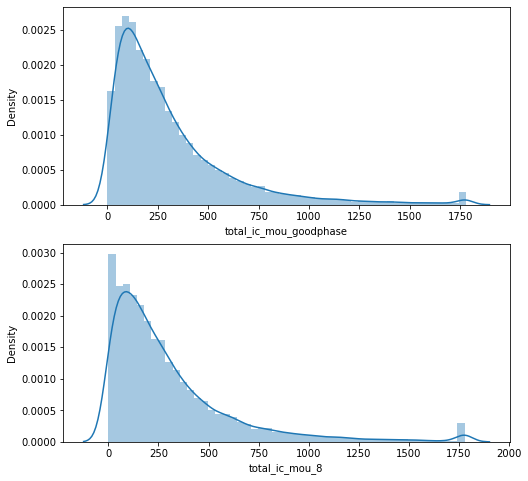

In [50]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
sns.distplot(df3["total_ic_mou_goodphase"])
plt.subplot(2,1,2)
sns.distplot(df3["total_ic_mou_8"])
plt.show()

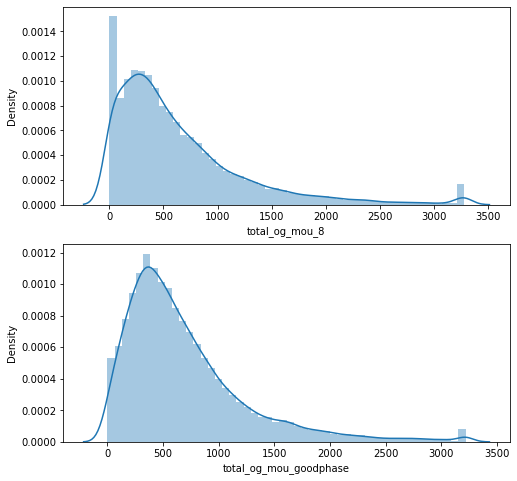

In [51]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(df3["total_og_mou_8"])
plt.subplot(2,1,2)
sns.distplot(df3["total_og_mou_goodphase"])
plt.show()

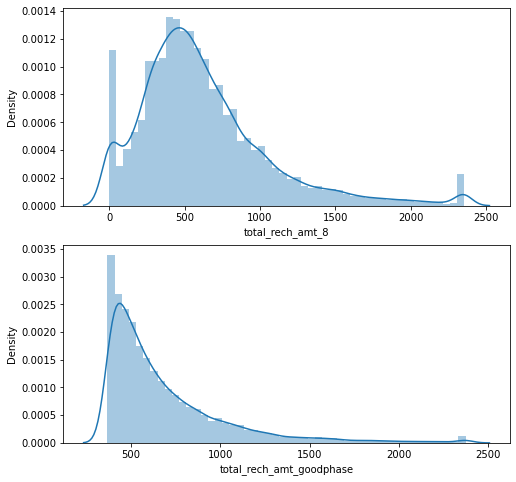

In [52]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(df3["total_rech_amt_8"])
plt.subplot(2,1,2)
sns.distplot(df3["total_rech_amt_goodphase"])
plt.show()

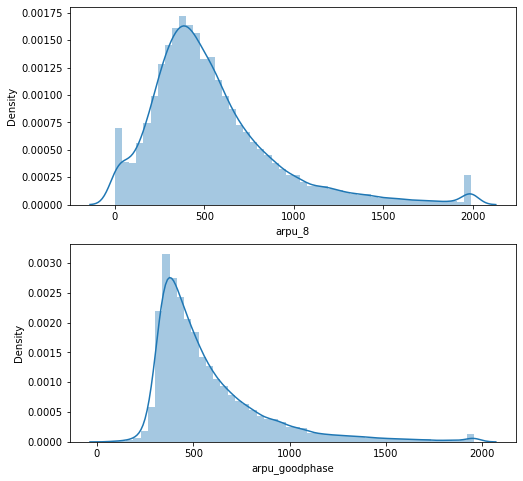

In [53]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(df3["arpu_8"])
plt.subplot(2,1,2)
sns.distplot(df3["arpu_goodphase"])
plt.show()

The above plots show that during the 8th month or action phase the distribution shows more density around 0 and the distribution getting more right-skewed

This can be interpreted as that during the action more users decrease there usage and recharge which is a good indicator of churn

### Bivariate analysis

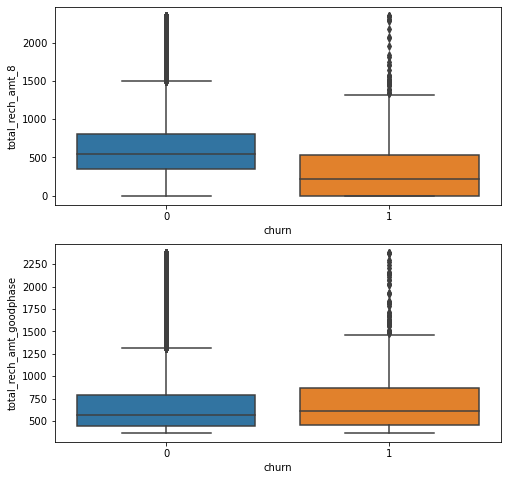

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df3,x='churn',y="total_rech_amt_8")
plt.subplot(2,1,2)
sns.boxplot(data=df3,x='churn',y="total_rech_amt_goodphase")
plt.show()

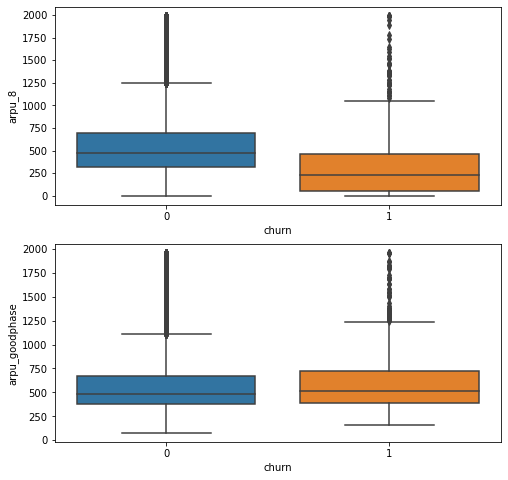

In [55]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df3,x='churn',y="arpu_8")
plt.subplot(2,1,2)
sns.boxplot(data=df3,x='churn',y="arpu_goodphase")
plt.show()

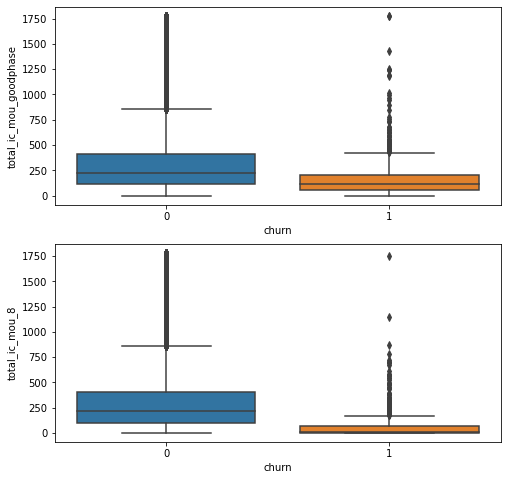

In [56]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df3,x='churn',y="total_ic_mou_goodphase")
plt.subplot(2,1,2)
sns.boxplot(data=df3,x='churn',y="total_ic_mou_8")
plt.show()

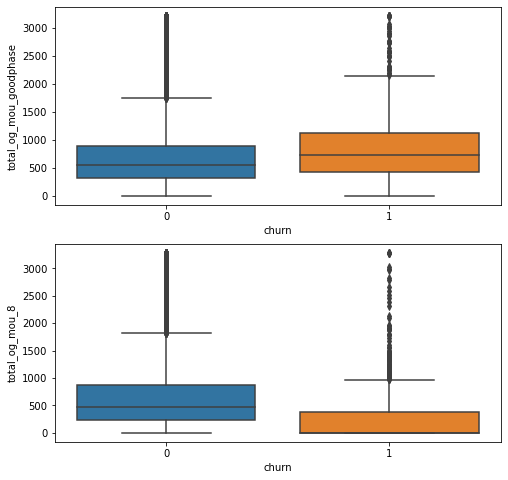

In [57]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df3,x='churn',y="total_og_mou_goodphase")
plt.subplot(2,1,2)
sns.boxplot(data=df3,x='churn',y="total_og_mou_8")
plt.show()

The above boxplots clearly depict that during the action phase the users who are about to churn have lower usage in terms of phone calls and they recharge less

## Model Building

### Creating Train and Test sets

In [58]:
# Importing library
from sklearn.model_selection import train_test_split

In [153]:
# Creating X and y variables
X = df3.drop(['churn'], axis=1)
y= df3['churn']

In [244]:
#Creating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,stratify=y, random_state=100)

In [155]:
#Checking for correlation
corr_df=X.corr()

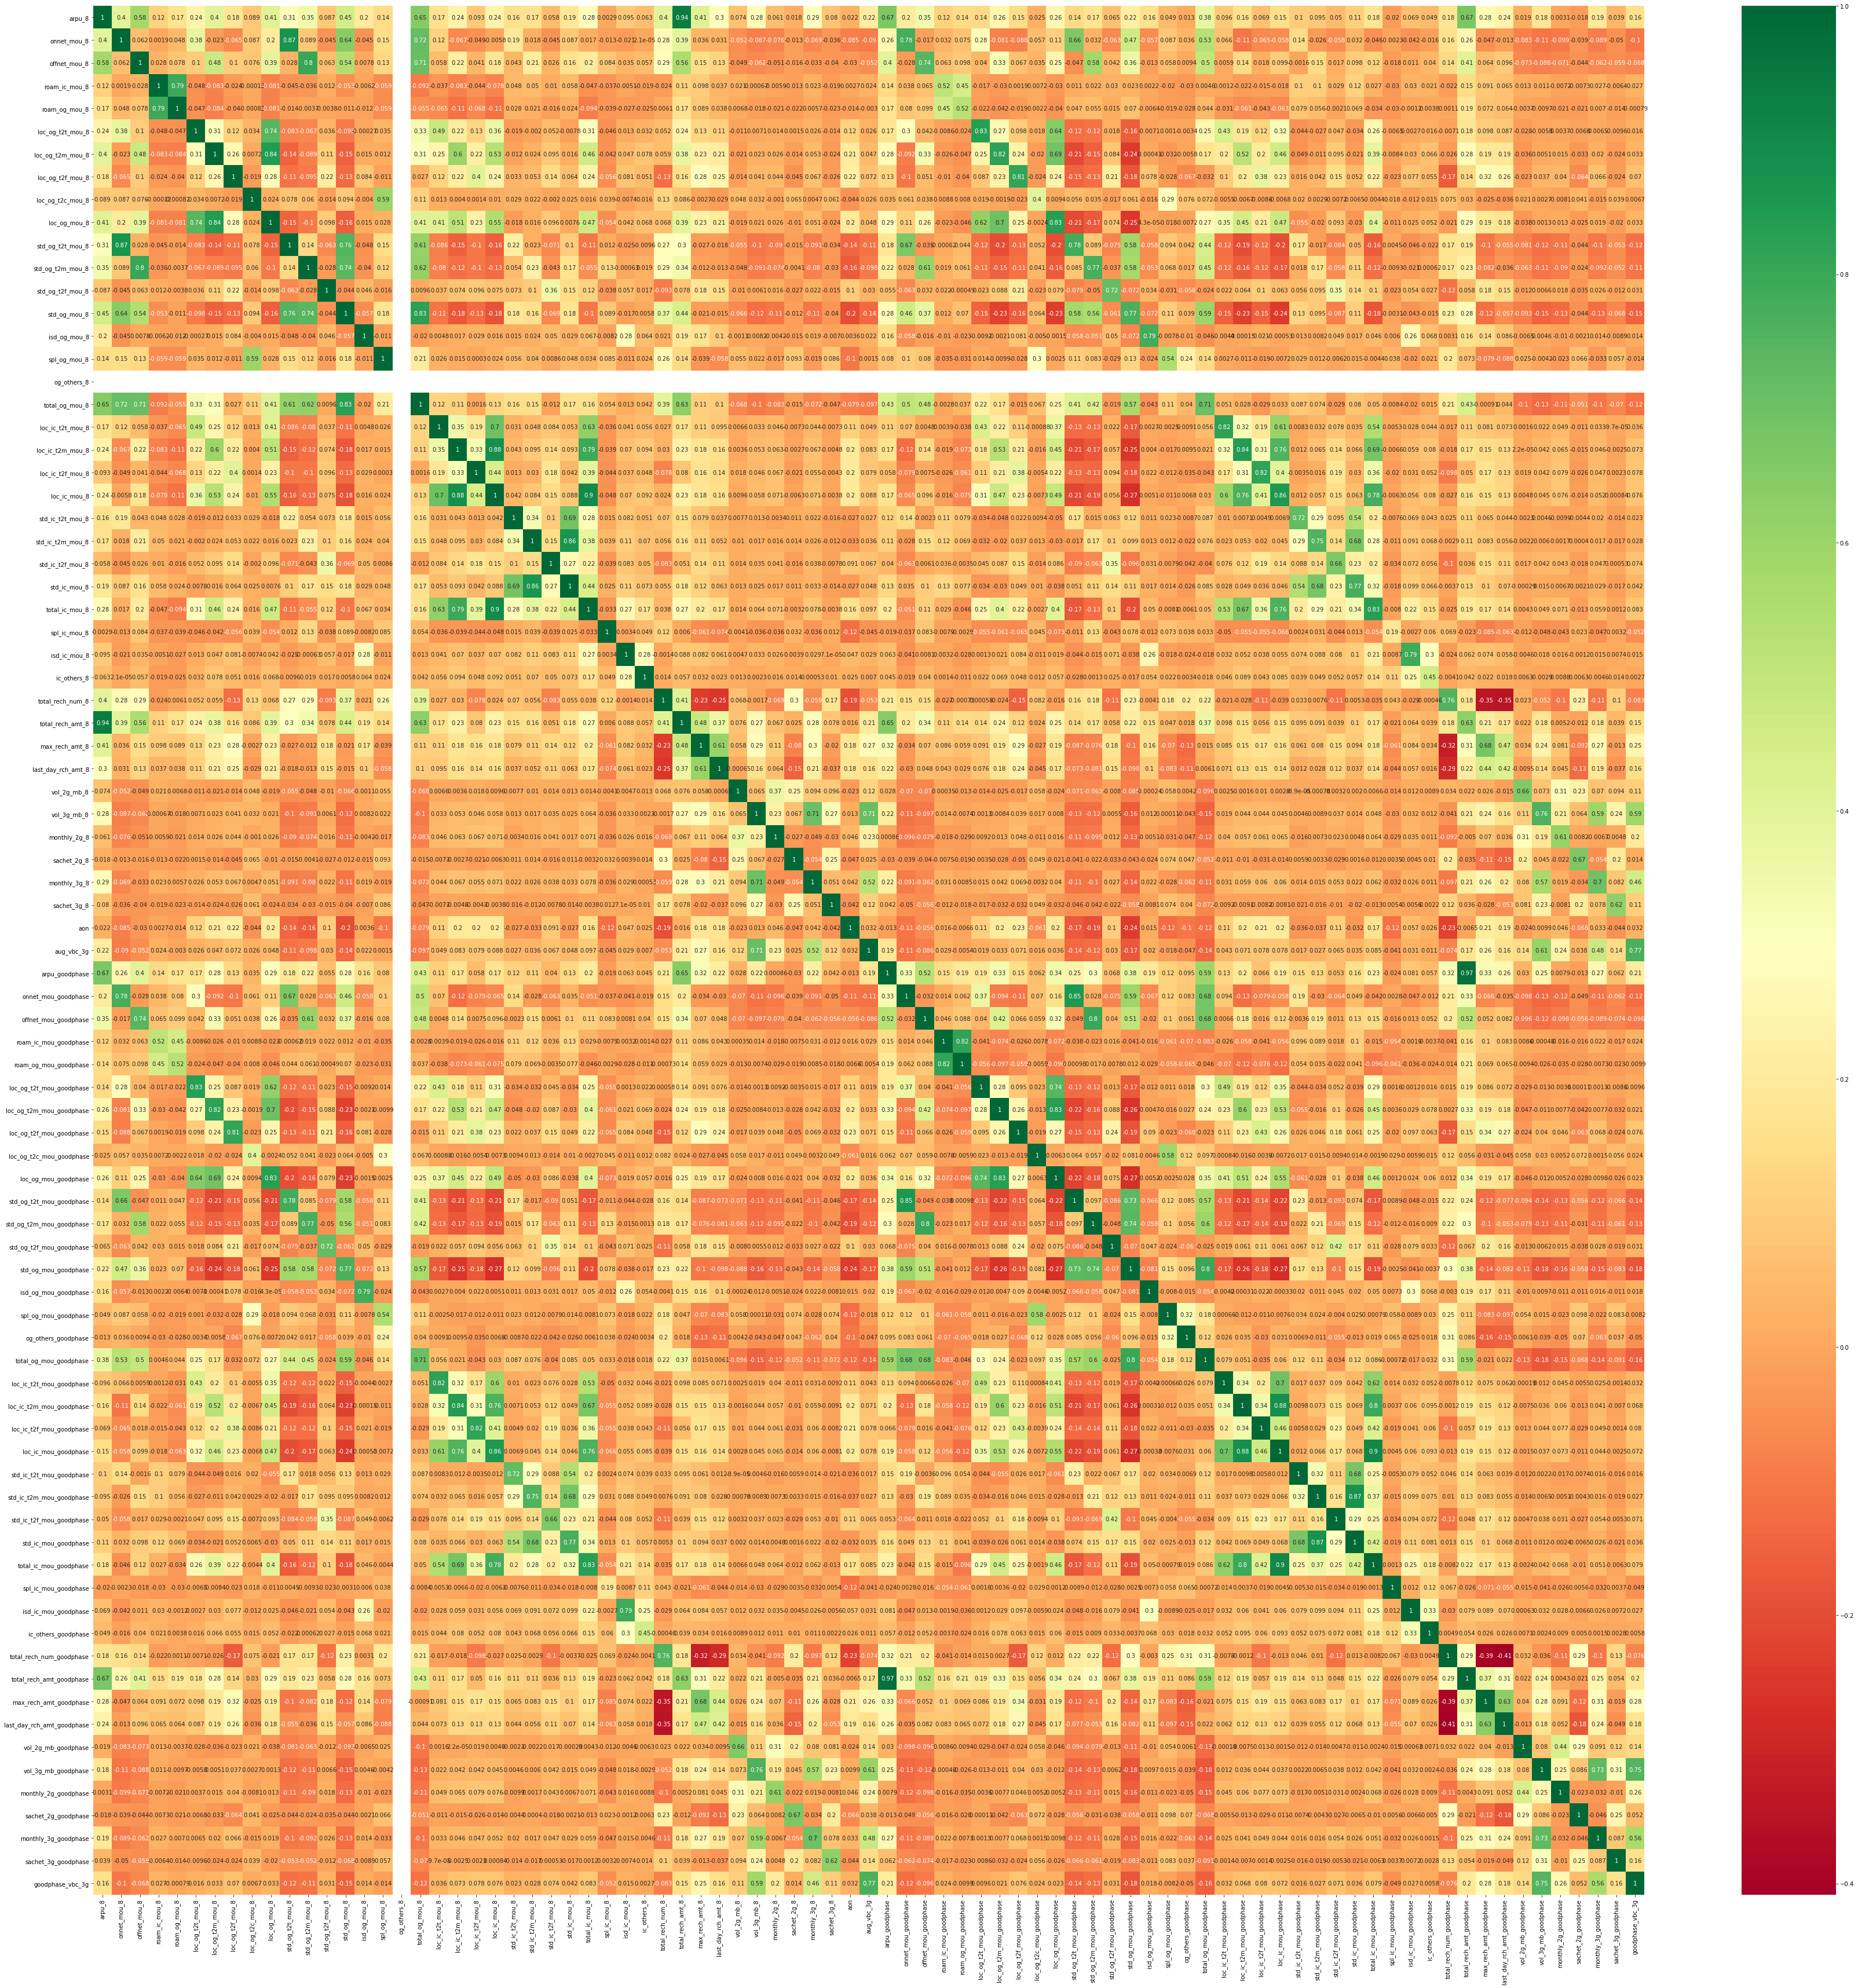

In [156]:
#Plotting the heatmap
plt.figure(figsize=[60,60])
sns.heatmap(corr_df,cmap="RdYlGn",annot=True)
plt.show()


### Handling Data imbalance

We will Use SMOTETomek to handle data imbalance

In [245]:
#Importing library and fitting the train data
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=100)
X_train, y_train = smt_tmk.fit_resample(X_train, y_train)

### Feature Scaling

In [158]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [266]:
#Scale the Train data
X_train_scaled=scaler.fit_transform(X_train)

In [267]:
#Write it to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [268]:
#Checking the scaled data
X_train_scaled.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,total_rech_amt_goodphase,max_rech_amt_goodphase,last_day_rch_amt_goodphase,vol_2g_mb_goodphase,vol_3g_mb_goodphase,monthly_2g_goodphase,sachet_2g_goodphase,monthly_3g_goodphase,sachet_3g_goodphase,goodphase_vbc_3g
count,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,...,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000,37838.000000
mean,0.214210,0.099745,0.133131,0.092270,0.108743,0.049686,0.090598,0.039893,0.041344,0.090436,...,0.160046,0.137430,0.149988,0.037367,0.045769,0.041713,0.047538,0.035822,0.024189,0.039416
std,0.182910,0.169499,0.174086,0.200596,0.212455,0.118241,0.153874,0.123387,0.126555,0.151943,...,0.172070,0.112889,0.122158,0.117415,0.136508,0.131783,0.132219,0.122822,0.105311,0.124262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080268,0.007738,0.021308,0.000000,0.000000,0.000000,0.000676,0.000000,0.000000,0.000869,...,0.041152,0.086294,0.070257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.182854,0.031968,0.071384,0.007412,0.010564,0.009888,0.025547,0.000000,0.000000,0.027169,...,0.100997,0.105584,0.125375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.291643,0.110281,0.172616,0.068640,0.109160,0.044334,0.112729,0.014756,0.006792,0.114789,...,0.222702,0.146400,0.194257,0.007658,0.000000,0.000000,0.018322,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
#Transforming the Test data
X_test_scaled=scaler.transform(X_test)
#Writing it to a dataframe
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Model Building

For classifying churn we will build two types of model : Logistic regression and RandomForest and compare their performances


#### Building the Logistic Regression model

In [270]:
#Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [271]:
logreg = LogisticRegression()

#### Feature Selection using RFE

In [272]:
# Currently we are starting with 15 features using RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20).fit(X_train_scaled, y_train)

In [273]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 18),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 31),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 28),
 ('loc_og_t2m_mou_8', False, 63),
 ('loc_og_t2f_mou_8', False, 29),
 ('loc_og_t2c_mou_8', False, 54),
 ('loc_og_mou_8', False, 30),
 ('std_og_t2t_mou_8', False, 35),
 ('std_og_t2m_mou_8', False, 6),
 ('std_og_t2f_mou_8', False, 19),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 9),
 ('spl_og_mou_8', False, 50),
 ('og_others_8', False, 64),
 ('total_og_mou_8', False, 60),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', False, 13),
 ('std_ic_t2f_mou_8', False, 21),
 ('std_ic_mou_8', False, 20),
 ('total_ic_mou_8', False, 62),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 40),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 17),
 ('max_re

In [274]:
cols_for_model=X_train_scaled.columns[rfe.support_]
cols_for_model

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'aug_vbc_3g',
       'onnet_mou_goodphase', 'offnet_mou_goodphase',
       'loc_og_t2m_mou_goodphase', 'std_ic_t2t_mou_goodphase',
       'last_day_rch_amt_goodphase'],
      dtype='object')

### Building the first regression model

In [275]:
# Building the first model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled[cols_for_model])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37838
Model:                            GLM   Df Residuals:                    37817
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12758.
Date:                Sun, 01 Oct 2023   Deviance:                       25517.
Time:                        14:38:52   Pearson chi2:                 1.38e+05
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.4785      0.046     32.016      0.000       1.388       1.569
onnet_mou_8                   -8.8355      0.381    -23.169      0.000      -9.583      -8.088
offnet_mou_8                  -8.6665      0.375    -23.116      0.000      -9.401      -7.932
roam_og_mou_8                  6.6910      0.153     43.714      0.000       6.391       6.991
std_og_mou_8                   9.0810      0.454     19.993      0.000       8.191       9.971
loc_ic_t2t_mou_8              15.4212     19.814      0.778      0.436     -23.414      54.257
loc_ic_t2m_mou_8              26.3895     30.849      0.855      0.392     -34.074      86.853
loc_ic_t2f_mou_8               1.9226      5.989      0.321      0.748      -9.816      13.662
loc_ic_mou_8                 -45.7042     45.850     -0.997      0.319    -135.568      44.159
std_ic_t2t_mou_8              -2.3582      0.215    -10.993      0.000      -2.779      -1.938
spl_ic_mou_8                  -2.4866      0.159    -15.636      0.000      -2.798      -2.175
ic_others_8                   -2.6050      0.290     -8.991      0.000      -3.173      -2.037
total_rech_num_8              -2.2900      0.129    -17.807      0.000      -2.542      -2.038
last_day_rch_amt_8            -3.4908      0.144    -24.273      0.000      -3.773      -3.209
vol_2g_mb_8                   -3.6871      0.233    -15.835      0.000      -4.143      -3.231
aug_vbc_3g                    -3.6998      0.242    -15.317      0.000      -4.173      -3.226
onnet_mou_goodphase            2.4275      0.127     19.054      0.000       2.178       2.677
offnet_mou_goodphase           2.6394      0.138     19.083      0.000       2.368       2.911
loc_og_t2m_mou_goodphase      -3.1336      0.236    -13.302      0.000      -3.595      -2.672
std_ic_t2t_mou_goodphase       1.9888      0.184     10.814      0.000       1.628       2.349
last_day_rch_amt_goodphase    -1.9592      0.182    -10.743      0.000      -2.317      -1.602
==============================================================================================
"""

In [276]:
# Check for the VIF values of variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols_for_model].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols_for_model].values, i) for i in range(X_train_scaled[cols_for_model].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,57.91
5,loc_ic_t2m_mou_8,30.35
3,std_og_mou_8,11.66
4,loc_ic_t2t_mou_8,10.42
1,offnet_mou_8,8.57
0,onnet_mou_8,7.03
17,loc_og_t2m_mou_goodphase,3.88
16,offnet_mou_goodphase,3.49
19,last_day_rch_amt_goodphase,2.87
11,total_rech_num_8,2.81


In [277]:
#Dropping loc_ic_mou_8 based on high VIF

cols_for_model=cols_for_model.drop("loc_ic_mou_8")

In [278]:
#Building the second model
X_train_sm = sm.add_constant(X_train_scaled[cols_for_model])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37838
Model:                            GLM   Df Residuals:                    37818
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12759.
Date:                Sun, 01 Oct 2023   Deviance:                       25518.
Time:                        14:39:05   Pearson chi2:                 1.38e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.4789      0.046     32.030      0.000       1.388       1.569
onnet_mou_8                   -8.8251      0.381    -23.167      0.000      -9.572      -8.078
offnet_mou_8                  -8.6554      0.374    -23.116      0.000      -9.389      -7.922
roam_og_mou_8                  6.6883      0.153     43.731      0.000       6.389       6.988
std_og_mou_8                   9.0699      0.454     19.987      0.000       8.181       9.959
loc_ic_t2t_mou_8              -4.3743      0.352    -12.432      0.000      -5.064      -3.685
loc_ic_t2m_mou_8              -4.3808      0.340    -12.874      0.000      -5.048      -3.714
loc_ic_t2f_mou_8              -4.0454      0.352    -11.482      0.000      -4.736      -3.355
std_ic_t2t_mou_8              -2.3562      0.214    -10.988      0.000      -2.777      -1.936
spl_ic_mou_8                  -2.4868      0.159    -15.636      0.000      -2.798      -2.175
ic_others_8                   -2.6038      0.290     -8.987      0.000      -3.172      -2.036
total_rech_num_8              -2.2898      0.129    -17.806      0.000      -2.542      -2.038
last_day_rch_amt_8            -3.4906      0.144    -24.270      0.000      -3.772      -3.209
vol_2g_mb_8                   -3.6870      0.233    -15.835      0.000      -4.143      -3.231
aug_vbc_3g                    -3.6997      0.242    -15.316      0.000      -4.173      -3.226
onnet_mou_goodphase            2.4274      0.127     19.053      0.000       2.178       2.677
offnet_mou_goodphase           2.6383      0.138     19.078      0.000       2.367       2.909
loc_og_t2m_mou_goodphase      -3.1309      0.235    -13.299      0.000      -3.592      -2.669
std_ic_t2t_mou_goodphase       1.9865      0.184     10.808      0.000       1.626       2.347
last_day_rch_amt_goodphase    -1.9587      0.182    -10.739      0.000      -2.316      -1.601
==============================================================================================
"""

In [279]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols_for_model].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols_for_model].values, i) for i in range(X_train_scaled[cols_for_model].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_8,11.65
1,offnet_mou_8,8.55
0,onnet_mou_8,7.02
16,loc_og_t2m_mou_goodphase,3.86
15,offnet_mou_goodphase,3.49
5,loc_ic_t2m_mou_8,2.89
18,last_day_rch_amt_goodphase,2.87
10,total_rech_num_8,2.81
14,onnet_mou_goodphase,2.72
17,std_ic_t2t_mou_goodphase,2.20


In [280]:
#Dropping std_og_mou_8 based on high VIF

cols_for_model=cols_for_model.drop("std_og_mou_8")

In [281]:
#Building the third model
X_train_sm = sm.add_constant(X_train_scaled[cols_for_model])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37838
Model:                            GLM   Df Residuals:                    37819
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13000.
Date:                Sun, 01 Oct 2023   Deviance:                       26001.
Time:                        14:39:14   Pearson chi2:                 1.68e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.4923      0.046     32.480      0.000       1.402       1.582
onnet_mou_8                   -1.8845      0.143    -13.216      0.000      -2.164      -1.605
offnet_mou_8                  -1.8973      0.149    -12.694      0.000      -2.190      -1.604
roam_og_mou_8                  4.9000      0.117     42.012      0.000       4.671       5.129
loc_ic_t2t_mou_8              -5.9399      0.354    -16.777      0.000      -6.634      -5.246
loc_ic_t2m_mou_8              -5.9590      0.341    -17.479      0.000      -6.627      -5.291
loc_ic_t2f_mou_8              -4.2570      0.352    -12.084      0.000      -4.948      -3.567
std_ic_t2t_mou_8              -2.3550      0.214    -11.013      0.000      -2.774      -1.936
spl_ic_mou_8                  -2.5601      0.159    -16.079      0.000      -2.872      -2.248
ic_others_8                   -2.6760      0.292     -9.162      0.000      -3.248      -2.104
total_rech_num_8              -2.2237      0.127    -17.551      0.000      -2.472      -1.975
last_day_rch_amt_8            -3.5100      0.143    -24.488      0.000      -3.791      -3.229
vol_2g_mb_8                   -3.7060      0.233    -15.882      0.000      -4.163      -3.249
aug_vbc_3g                    -3.6699      0.240    -15.297      0.000      -4.140      -3.200
onnet_mou_goodphase            2.5081      0.127     19.825      0.000       2.260       2.756
offnet_mou_goodphase           3.1360      0.139     22.634      0.000       2.864       3.408
loc_og_t2m_mou_goodphase      -4.9212      0.214    -22.965      0.000      -5.341      -4.501
std_ic_t2t_mou_goodphase       2.1131      0.183     11.571      0.000       1.755       2.471
last_day_rch_amt_goodphase    -2.2428      0.179    -12.499      0.000      -2.595      -1.891
==============================================================================================
"""

In [282]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols_for_model].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols_for_model].values, i) for i in range(X_train_scaled[cols_for_model].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,3.36
14,offnet_mou_goodphase,3.33
17,last_day_rch_amt_goodphase,2.87
4,loc_ic_t2m_mou_8,2.86
15,loc_og_t2m_mou_goodphase,2.80
9,total_rech_num_8,2.79
13,onnet_mou_goodphase,2.71
0,onnet_mou_8,2.71
16,std_ic_t2t_mou_goodphase,2.20
10,last_day_rch_amt_8,2.19


All the VIFs are below 5 and therefore we can consider this model to be the final one

### Making predictions on the train set

In [283]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.00288431, 0.24440275, 0.87331341, ..., 0.89307263, 0.92554646,
       0.59725473])

In [284]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred})
y_train_pred_final.head()

,churn,churn_prob
0,0,0.002884
1,0,0.244403
2,0,0.873313
3,0,0.751025
4,0,0.577825


### Plotting the ROC curve

In [285]:
#Importing metrics
from sklearn import metrics

In [286]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [287]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )


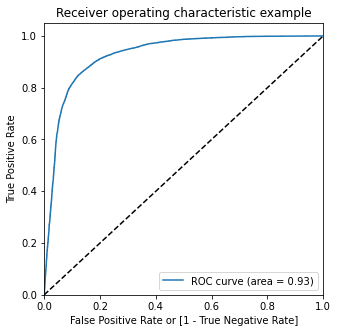

In [288]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)


The AUC for the ROC curve is 0.92 which shows that the model is significant

### Determining the optimal cut off point

In [289]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002884,1,0,0,0,0,0,0,0,0,0
1,0,0.244403,1,1,1,0,0,0,0,0,0,0
2,0,0.873313,1,1,1,1,1,1,1,1,1,0
3,0,0.751025,1,1,1,1,1,1,1,1,0,0
4,0,0.577825,1,1,1,1,1,1,0,0,0,0


In [290]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.753000  0.984513  0.521486
0.2   0.2  0.803954  0.964797  0.643110
0.3   0.3  0.832840  0.942122  0.723558
0.4   0.4  0.852582  0.917543  0.787621
0.5   0.5  0.860220  0.881389  0.839051
0.6   0.6  0.861700  0.839526  0.883873
0.7   0.7  0.843940  0.766742  0.921137
0.8   0.8  0.805539  0.662561  0.948517
0.9   0.9  0.678286  0.383847  0.972726


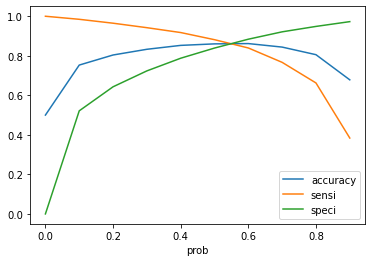

In [291]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Precision and recall curve

In [292]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)

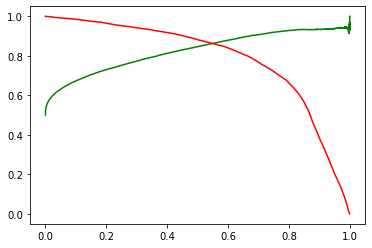

In [293]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Based on the precision and recall curve and the accuracy, sensitivity and specificiy plot, we can assume 0.5 as the optimal cutoff point 

In [294]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002884,1,0,0,0,0,0,0,0,0,0,0
1,0,0.244403,1,1,1,0,0,0,0,0,0,0,0
2,0,0.873313,1,1,1,1,1,1,1,1,1,0,1
3,0,0.751025,1,1,1,1,1,1,1,1,0,0,1
4,0,0.577825,1,1,1,1,1,1,0,0,0,0,1


### Evaluating the model

In [295]:
#Checking overall accuracy
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8602198847719225

In [296]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion

array([[15874,  3045],
       [ 2244, 16675]], dtype=int64)

In [297]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [298]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8813890797610867

In [299]:
#specificity
TN / float(TN+FP)

0.8390506897827581

In [300]:
# false postive rate 
print(FP/ float(TN+FP))

0.16094931021724193


In [301]:
#Precision
print(precision_score(y_train_pred_final.churn , y_train_pred_final.final_predicted))

0.8455882352941176


### Making Predictions on test data

In [303]:
#Selecting the final relevant columns
X_test=X_test_scaled[cols_for_model]

In [304]:
X_test.head()

,onnet_mou_8,offnet_mou_8,roam_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,spl_ic_mou_8,ic_others_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,aug_vbc_3g,onnet_mou_goodphase,offnet_mou_goodphase,loc_og_t2m_mou_goodphase,std_ic_t2t_mou_goodphase,last_day_rch_amt_goodphase
0,0.035996,0.204696,0.0,0.082789,0.133437,0.102616,0.095663,0.0,0.0,0.260870,0.230088,0.000000,0.000000,0.034223,0.189955,0.169634,0.027401,0.092905
1,0.000374,0.070950,0.0,0.003572,0.157433,0.015177,0.000000,0.0,0.0,0.065217,0.230088,0.000000,0.000000,0.000684,0.080793,0.160962,0.000000,0.050676
2,0.403009,0.251117,0.0,0.217486,0.110643,0.152086,0.815413,0.0,0.0,0.086957,0.118584,0.000000,0.000000,0.624133,0.203730,0.102023,0.435296,1.000000
3,0.057657,0.090699,0.0,0.218219,0.256072,0.000000,0.000000,0.0,0.0,0.086957,0.230088,0.040183,0.926606,0.060369,0.066905,0.130664,0.000000,0.230574
4,0.096011,0.130077,0.0,0.051096,0.120241,0.009738,0.039330,0.0,0.0,0.108696,0.230088,0.000000,0.000000,0.150933,0.084358,0.115034,0.112777,0.202703


In [305]:
X_test_sm = sm.add_constant(X_test)

In [306]:
y_test_pred = result.predict(X_test_sm)

In [307]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [308]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
96059,0
13582,0
71904,0
59455,0
79771,0


In [309]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [310]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [311]:
y_test_pred_final.head()

,churn,0
0,0,0.068859
1,0,0.219209
2,0,0.011064
3,0,0.000948
4,0,0.217867


In [312]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'churn_prob'})


In [313]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [314]:
#Accuracy
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.8306739699928555

In [315]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[6733, 1380],
       [  42,  243]], dtype=int64)

In [316]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [317]:
#Sensitivity
print('Sensitivity:',TP / float(TP+FN))
#specificity
print('specificity:',TN / float(TN+FP))
# false postive rate 
print('False Positive Rate:', FP/ float(TN+FP))
#Precision
print('Precision:',precision_score(y_test_pred_final.churn , y_test_pred_final.final_predicted))
#Recall
print('Recall:',recall_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

Sensitivity: 0.8526315789473684
specificity: 0.829902625415999
False Positive Rate: 0.17009737458400098
Precision: 0.14972273567467653
Recall: 0.8526315789473684


Model Evaluation Parameters

Accuracy

Train data: 86%
Test Data: 85%

Sensitivity

Train data: 88%
Test Data: 85%

Specificity

Train data: 84%
Test Data: 83%


We can see that the model performs well on both test and train data and therefore we can use this as a model of choice

 ### Building Random forest model

In [120]:
#Importing the randomforest library
from sklearn.ensemble import RandomForestClassifier 

In [212]:
#Creating train and test data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, train_size=0.7, test_size=0.3,stratify=y, random_state=100)

In [213]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=100, oob_score=True)
rf_model.fit(X_train_rf, y_train_rf)  

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=15,
                       oob_score=True, random_state=100)

In [214]:
#Checking the OOB score
rf_model.oob_score_

0.9675394273465013

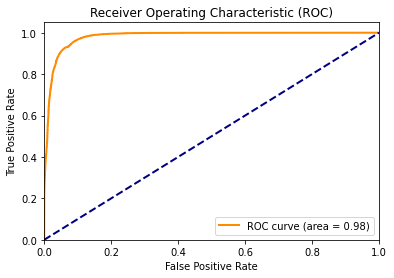

In [215]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve, auc


y_score = rf_model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

We see a ROC curve of 0.98 which shows that the random forest is performing better than the logistic regression|

### Hyper-parameter tuning for the Random Forest

In [216]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [217]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [218]:
#Using GridsearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [219]:
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [220]:
grid_search.fit(X_train_rf, y_train_rf)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=10, max_features=5,
                                              n_estimators=15, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [221]:
#Estimating the best accuracy score
grid_search.best_score_

0.9686622927271347

In [222]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=5,
                       n_estimators=25, oob_score=True, random_state=100)

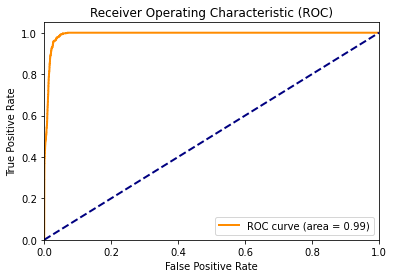

In [223]:
#Plotting ROC after hyperparameter fine tuning
y_score = rf_best.predict_proba(X_train_rf)[:, 1]
fpr, tpr, _ = roc_curve(y_train_rf, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Predictions on train data

In [224]:
y_train_pred_rf = rf_best.predict(X_train_rf)

In [225]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rf, y_train_pred_rf)
print(confusion)

[[18887    42]
 [  378   286]]


In [226]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [228]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_rf, y_train_pred_rf))
#Sensitivity
print('Sensitivity:',TP / float(TP+FN))
#specificity
print('specificity:',TN / float(TN+FP))
# false postive rate 
print('False Positive Rate:', FP/ float(TN+FP))


Accuracy: 0.9785637727759914
Sensitivity: 0.4307228915662651
specificity: 0.9977811823128533
False Positive Rate: 0.002218817687146706


### Prediction on the test set

In [229]:
y_test_pred_rf = rf_best.predict(X_test_rf)

In [230]:
confusion = metrics.confusion_matrix(y_test_rf, y_test_pred_rf)
print(confusion)

[[8045   68]
 [ 210   75]]


In [231]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [233]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test_rf, y_test_pred_rf))
#Sensitivity
print('Sensitivity:',TP / float(TP+FN))
#specificity
print('specificity:',TN / float(TN+FP))
# false postive rate 
print('False Positive Rate:', FP/ float(TN+FP))


Accuracy: 0.9668968802095738
Sensitivity: 0.2631578947368421
specificity: 0.9916183902378898
False Positive Rate: 0.008381609762110194


In [236]:
#Identifying important features
imp_df = pd.DataFrame({
    "Varname": X_train_rf.columns,
    "Imp": rf_best.feature_importances_
})

In [237]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,roam_ic_mou_8,0.088660
9,loc_og_mou_8,0.062460
21,loc_ic_mou_8,0.055090
4,roam_og_mou_8,0.050957
19,loc_ic_t2m_mou_8,0.041146
...,...,...
12,std_og_t2f_mou_8,0.000376
39,sachet_3g_8,0.000334
81,sachet_3g_goodphase,0.000224
27,spl_ic_mou_8,0.000093


#### The random forest model gives better results in terms of accuracy and specificity vs the logreg model however the logistic regression model has better results in terms of sensitivity and overall better performance

#### Since the aim of this model is to correctly identify churn sensitivity is the more important evaluation metric and therefore we go with the logistic regression model as model of choice 

In [238]:
#Selecting the top variables from logistic regression
result.params.sort_values(ascending=False)

roam_og_mou_8                 4.899963
offnet_mou_goodphase          3.136045
onnet_mou_goodphase           2.508063
std_ic_t2t_mou_goodphase      2.113109
const                         1.492333
onnet_mou_8                  -1.884509
offnet_mou_8                 -1.897319
total_rech_num_8             -2.223718
last_day_rch_amt_goodphase   -2.242849
std_ic_t2t_mou_8             -2.354985
spl_ic_mou_8                 -2.560100
ic_others_8                  -2.676003
last_day_rch_amt_8           -3.509998
aug_vbc_3g                   -3.669895
vol_2g_mb_8                  -3.706046
loc_ic_t2f_mou_8             -4.257045
loc_og_t2m_mou_goodphase     -4.921198
loc_ic_t2t_mou_8             -5.939872
loc_ic_t2m_mou_8             -5.958982
dtype: float64

### Plotting the important variables

<AxesSubplot:xlabel='roam_og_mou_8', ylabel='Density'>

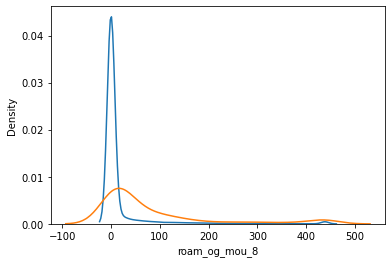

In [240]:
sns.distplot(df3[df3['churn']==0]['roam_og_mou_8'],hist=False,)
sns.distplot(df3[df3['churn']==1]['roam_og_mou_8'],hist=False)

<AxesSubplot:xlabel='loc_ic_t2m_mou_8', ylabel='Density'>

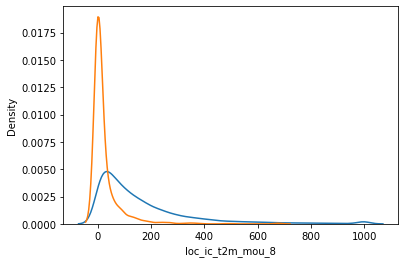

In [242]:
sns.distplot(df3[df3['churn']==0]['loc_ic_t2m_mou_8'],hist=False)
sns.distplot(df3[df3['churn']==1]['loc_ic_t2m_mou_8'],hist=False)

<AxesSubplot:xlabel='loc_ic_t2t_mou_8', ylabel='Density'>

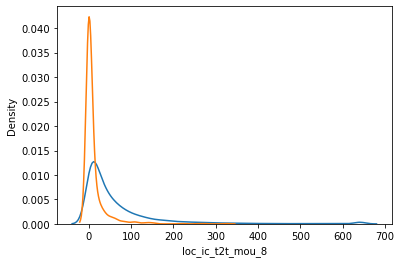

In [243]:
sns.distplot(df3[df3['churn']==0]['loc_ic_t2t_mou_8'],hist=False)
sns.distplot(df3[df3['churn']==1]['loc_ic_t2t_mou_8'],hist=False)

### Recommendations:

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing local calls decrease in action phase vas good phase
2. Target the customers, with higher recharge amount in good phase.
3. Customers with higher roaming outgoing in the action phase are more likely to churn, therefore the company should provide good plans to customers moving to a different location and on a roaming plan
4. Customers whose volume based cost decreases during action phase are more likely to churn and should be targeted
5. CUSTOMERS whose local incoming call minutes of usage with other operator mobile decreases and STD incoming minutes of usage with the same operator decreases in the month of august most likely to get churned, targeting such customer with attractive local and STD offers decrease the chances of churning..
6. If the customers last day recharge amount in good phase and in the month of august decreases are more likely to be churned companies should focus and provide customers long term plans with exclusive benefits likely decrease chances of churning
7. Special incoming call minutes of usage decreases in the month of August more likely to be churned
8. Providing customization option to the customers to choose the pack based on their personal usage pattern,preferences and place of stay ,will likely decrease the chances of churning.
9. For the customers classified as a probable churn, provide the customers with attractive offers they cannot resist and retain them.
10. Provide offers on long term plans so that the customer would be loyal.
11. Provide the customers offers based on their usage and profile.